In [12]:
import numpy as np
import matplotlib.pyplot as plt

import HybridQubit as hybrid

In [171]:
def soss_finder(fit_params, operating_point, match_freq):
    from scipy.optimize import root
    
    def soss_helper(fit_params, operating_point, match_freq):
        stsplitting, delta1, delta2 = fit_params
        h = 1e-3
        ed = operating_point * stsplitting
        q0 = hybrid.HybridQubit(ed, stsplitting, delta1, delta2)
        qm2 = hybrid.HybridQubit(ed - 2*h, stsplitting, delta1, delta2)
        qm1 = hybrid.HybridQubit(ed - 1*h, stsplitting, delta1, delta2)
        qp1 = hybrid.HybridQubit(ed + 1*h, stsplitting, delta1, delta2)
        qp2 = hybrid.HybridQubit(ed + 2*h, stsplitting, delta1, delta2)
        test_array = np.array([qm2.qubit_splitting(),
                      qm1.qubit_splitting(),
                      q0.qubit_splitting(),
                      qp1.qubit_splitting(),
                      qp2.qubit_splitting()]) / (2 * np.pi)
        coeff_array1 = np.array([1/12, -2/3, 0, 2/3, -1/12])
        coeff_array2 = np.array([-1/12, 4/3, -5/2, 4/3, -1/12])
        deriv1 = np.dot(coeff_array1, test_array) / h
        deriv2 = np.dot(coeff_array2, test_array) / h**2
        resonance = q0.qubit_splitting() - 2*np.pi*match_freq
        return [deriv1, deriv2, resonance]
    
    tunings = root(soss_helper,
                   fit_params,
                   args=(operating_point, match_freq),
                   method='hybr', tol=1e-12, options={'eps': 1e-18}).x
    return tunings

In [172]:
dim = 400
ed_ratio_array = np.linspace(0.0, 10.0, dim)
match_freq = 10.0

delta1_array = np.zeros((dim))
delta2_array = np.zeros((dim))
st_array = np.zeros((dim))
ed_array = np.zeros((dim))
guess = [match_freq, match_freq / np.sqrt(2), match_freq / np.sqrt(2)]
for i in range(dim-1, -1, -1):
    tunings = soss_finder(guess, ed_ratio_array[i], match_freq)
    stsplitting, delta1, delta2 = tunings
    delta1_array[i] = delta1
    delta2_array[i] = delta2
    st_array[i] = stsplitting
    guess = [stsplitting, delta1, delta2]

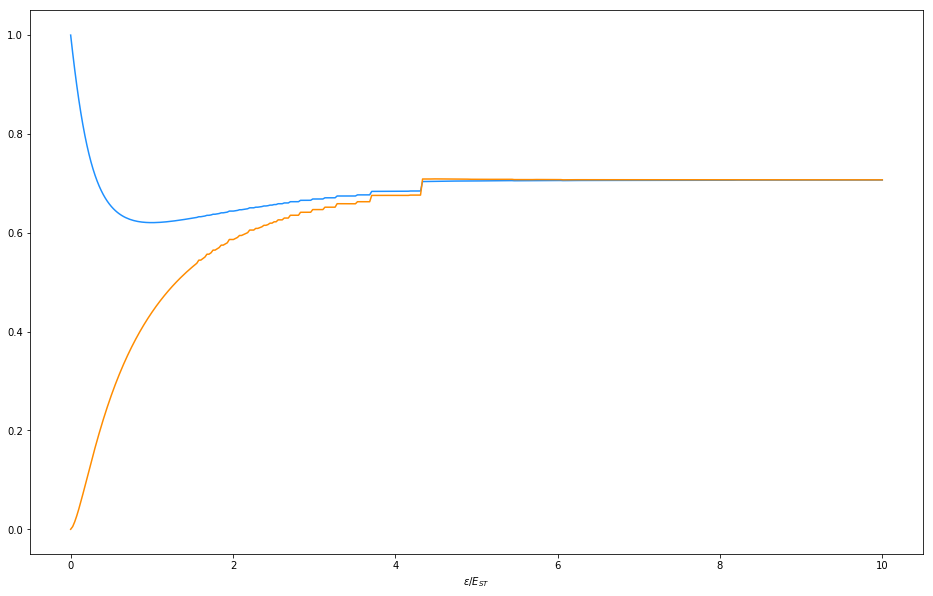

In [173]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(ed_ratio_array, np.divide(delta1_array, st_array),
        color='dodgerblue')
ax.plot(ed_ratio_array, np.divide(delta2_array, st_array),
        color='darkorange')
ax.set_xlabel(r'$\varepsilon / E_{ST}$')
plt.show()